<a href="https://colab.research.google.com/github/SoremiKayode/COMP5000-2022-labs/blob/main/assig_zerotogbms_Bond_Price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project is step by step walkthrough on training a machine learning [(ML)](https://www.oracle.com/ng/data-science/machine-learning/what-is-machine-learning/)) model to predict the next price that a US corporate bond might trade at.


**[A Bond](https://www.investopedia.com/articles/bonds/08/bond-market-basics.asp)** is simply a loan taken out by a
company. Instead of going to a bank, the company gets the money from investors who buy its bonds. In exchange for the capital, the company pays an interest coupon, which is the annual interest rate paid on a bond expressed as a percentage of the face value. The company pays the interest at predetermined intervals (usually annually or semiannually) and returns the principal on the maturity date, ending the loan.

The dataset use in this Project is from a competition hosted by Bench Mark Bond on **[kaggle](https://www.kaggle.com/)**, kaggle is a subsidiary of Google LLC; an online community of data scientists and machine learning practitioners.

visit this link to download the dataset : https://www.kaggle.com/c/benchmark-bond-trade-price-challenge/data?select=old_data.zip

Just like training any Machine learning Model, we will walk through the following steps to train our Model, but before that let us understand the Objective behind this project,

**QUESTION** : **[Benchmark Solution](http://www.benchmarksolutions.us.com/)** a company that provide financial advise to Businesses and also help their client invest in Corporate Bond, wants to beat the market, by being able to predict beforehand the next trading price of US corporate Bond

**steps to train the model**



*   **Data Collection.**
*   **Exploratory Data Analysis**
*   **Data Preparation.**
*   **Choose a Model.**
*   **Train the Model.**
*   **Evaluate the Model.**
*   **Parameter Tuning.**
*   **Make Predictions.**


**INSTALLING THE LIBRARIES WE NEED**

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
#!pip install seaborn
!pip install catboost

     |████████████████████████████████| 69.2 MB 5.1 kB/s 


**IMPORTING THE LIBRARIES AFTER INSTALLING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost

**DOWNLOADING OUR DATASET**

Instead of manually downloading our dataset from kaggle, we will make use of the opendatsets library to download our dataset.
This requires kaggle username and password.
To get your username and key, login to your kaggle account, at the top right corner click on the bird like icon, click on 'Account' scroll down, under the api jumbotron, click on 'Create New API Token'. A new API token will be generated for you and downloaded to your system

In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [ ]:
# This is the link to our dataset :
dir = "https://www.kaggle.com/c/benchmark-bond-trade-price-challenge/data?select=old_data.zip"
# with the help of the opendatasets library we can download our the data
od.download(dir)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: soremibarnabas
Your Kaggle Key: ··········


  2%|▏         | 9.00M/563M [00:00<00:07, 73.2MB/s]

100%|██████████| 563M/563M [00:04<00:00, 137MB/s]



Extracting archive ./benchmark-bond-trade-price-challenge/benchmark-bond-trade-price-challenge.zip to ./benchmark-bond-trade-price-challenge


In [ ]:
# lets use python os module to view our directory
import os

In [ ]:
os.listdir()
#'benchmark-bond-trade-price-challenge' is the data we just downloaded

['.config', 'benchmark-bond-trade-price-challenge', 'sample_data']

In [ ]:
dir = 'benchmark-bond-trade-price-challenge'
os.listdir(dir)

['old_data.zip',
 'train.7z',
 'test.7z',
 'test.zip',
 'train.zip',
 'test.csv',
 'train.csv',
 'test.mat',
 'train.mat',
 'random_forest_sample_submission.csv',
 'random_forest_benchmark.r']

we have eleven files in the folder we just downloaded, but we are only concern about two files; 'train.csv' and 'test.csv'. Lets open up those two files using pandas library and store them as 'train_data' and 'test_data' respectively

In [ ]:
train_data = pd.read_csv(f'{dir}/train.csv')
test_data = pd.read_csv(f'{dir}/test.csv')

In [ ]:
train_data

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,120000,2,127.561201,1213791.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,85000,4,126.323528,705339.0,128.596,120000.0,2.0,127.561201,1464101.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,4200000,3,126.761433,254752.0,126.673,85000.0,4.0,126.323528,709781.0,128.596,120000.0,2.0,127.561201,1468543.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,5000001,2,127.025765,848925.0,126.880,4200000.0,3.0,126.761433,1099236.0,126.673,85000.0,4.0,126.323528,1554265.0,128.596,120000.0,2.0,127.561201,2313027.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762673,762674,915157,101.334,0.554384,5.75,10.005765,0,2.363,50000,3,101.480892,1820,101.257,165000,3,101.366967,2397.0,102.259,15000.0,3.0,101.324067,2733.0,101.418,5000000.0,3.0,101.324067,2848.0,101.541,2000000.0,4.0,101.324067,2977.0,101.259,15000.0,4.0,101.324067,3363.0,101.328,180000.0,4.0,101.266945,3505.0,101.391,50000.0,3.0,101.266945,3510.0,101.391,50000.0,4.0,101.266945,3520.0,101.391,50000.0,4.0,101.266945,3555.0,101.059,500000.0,2.0,101.266945
762674,762675,915157,101.303,0.261769,5.75,10.005752,0,154.395,500000,2,101.487747,405,101.334,50000,3,101.480892,2225.0,101.257,165000.0,3.0,101.366967,2802.0,102.259,15000.0,3.0,101.324067,3138.0,101.418,5000000.0,3.0,101.324067,3253.0,101.541,2000000.0,4.0,101.324067,3382.0,101.259,15000.0,4.0,101.324067,3768.0,101.328,180000.0,4.0,101.266945,3910.0,101.391,50000.0,3.0,101.266945,3915.0,101.391,50000.0,4.0,101.266945,3925.0,101.391,50000.0,4.0,101.266945
762675,762676,915157,101.503,0.321389,5.75,10.005733,0,48.93

In [ ]:
test_data

,id,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,762679,0.733639,1.30278,1.090694,0,68.135,2250000,2,98.521799,3188,98.200000,5000001,3,98.501951,98934.0,98.0244,145000.0,4.0,98.526323,98934.0,98.0244,145000.0,2.0,98.526323,174891.0,98.200,5000001.0,3.0,98.488617,698564.0,97.942,5000001.0,2.0,98.293641,864615.0,98.8500,300000.0,3.0,98.346771,865338.0,98.740,300000.0,4.0,98.353190,869248.0,98.000,100000.0,3.0,98.358220,869248.0,98.000,100000.0,4.0,98.358220,883612.0,97.050000,100000.0,2.0,98.315355
1,762680,0.403570,8.50000,7.472191,0,2.421,3000,2,119.292424,964,116.417666,3000,3,119.380981,964.0,116.1510,3000.0,4.0,119.380981,974.0,116.1510,3000.0,4.0,119.380981,65470.0,115.592,900000.0,3.0,118.288286,69638.0,115.268,10000.0,4.0,118.356743,69638.0,116.7680,10000.0,3.0,118.356743,69873.0,115.500,195000.0,2.0,118.356743,69874.0,115.500,195000.0,3.0,118.356743,150886.0,115.166,1200000.0,2.0,117.986068,152610.0,115.342000,2200000.0,2.0,117.950083
2,762681,0.416940,8.62500,8.378550,1,25.469,1000000,4,103.973124,1029,104.750000,1000000,4,103.420577,8634.0,104.5000,1000001.0,2.0,103.528594,9664.0,104.5000,1000001.0,3.0,103.478882,16827.0,105.100,11000.0,3.0,102.802233,16827.0,105.000,11000.0,4.0,102.802233,16841.0,105.0000,11000.0,4.0,102.802233,16842.0,105.000,11000.0,4.0,102.802233,82527.0,103.000,1000001.0,3.0,102.794562,82532.0,104.000,5000.0,4.0,102.794562,82534.0,104.000000,5000.0,4.0,102.794562
3,762682,0.012991,7.00000,1.715990,0,12.188,25000,4,106.680891,0,106.693000,15000,3,106.680891,0.0,106.6930,10000.0,3.0,106.680891,7.0,106.6930,25000.0,4.0,106.680891,510.0,107.875,70000.0,3.0,106.677745,695.0,106.693,70000.0,4.0,106.677745,2026.0,107.2500,3000.0,3.0,106.683246,2151.0,106.693,9000.0,4.0,106.694550,2151.0,107.813,9000.0,3.0,106.694550,2209.0,106.754,10000.0,3.0,106.694550,2959.0,107.193000,15000.0,3.0,106.711338
4,762683,14.730664,5.62500,1.241897,0,84.129,1000000,4,103.369002,1285682,101.511000,3000,2,103.509270,1285683.0,102.3860,3000.0,4.0,103.509270,2606546.0,103.3140,10000.0,2.0,103.569851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61141,823820,0.131848,5.62500,7.822351,0,3.054,15000,3,87.727603,102,89.326000,50000,3,87.727603,255.0,89.1730,5000.0,3.0,87.736304,355.0,90.0300,25000.0,3.0,87.736304,898.0,90.127,17000.0,3.0,87.693614,1012.0,86.400,100000.0,4.0,87.693614,1012.0,86.0000,100000.0,4.0,87.693614,1545.0,90.250,25000.0,3.0,87.679456,1616.0,86.750,54000.0,2.0,87.679456,2050.0,87.182,100000.0,2.0,87.660500,2220.0,88.250000,25000.0,4.0,87.660500
61142,823821,0.012991,4.95000,3.721057,0,7.063,40000,4,99.563152,0,101.352000,4

In [ ]:
print(f'Training Data has {train_data.shape[0]} rows of data')
print(f'Test data has {test_data.shape[0]} rows of data')
print(f'Training Data has {train_data.shape[1]} columns')
print(f'Test data has {test_data.shape[1]} columns')

Training Data has 762678 rows of data
Test data has 61146 rows of data
Training Data has 61 columns
Test data has 59 columns


Let's take a look at some statistics about our data

In [ ]:
train_data.describe()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
count,762678.000000,762678.000000,762678.000000,762678.000000,762678.000000,762678.000000,762678.000000,7.626780e+05,7.626780e+05,762678.000000,762678.000000,7.626780e+05,762678.000000,7.626780e+05,762678.000000,762639.000000,7.606780e+05,760678.000000,7.606780e+05,760678.000000,760602.000000,7.587080e+05,758708.000000,7.587080e+05,758708.000000,758596.000000,7.567560e+05,756756.000000,7.567560e+05,756756.000000,756609.000000,7.548300e+05,754830.000000,7.548300e+05,754830.000000,754648.000000,7.529230e+05,752923.000000,7.529230e+05,752923.000000,752706.000000,7.510150e+05,751015.000000,7.510150e+05,751015.000000,750764.000000,7.491210e+05,749121.000000,7.491210e+05,749121.000000,748836.000000,7.472350e+05,747235.000000,7.472350e+05,747235.000000,746916.000000,7.453620e+05,745362.000000,7.453620e+05,745362.000000,745009.000000
mean,381339.500000,203276.404997,103.440546,0.983026,5.588142,6.564305,0.111405,2.823761e+04,2.672078e+05,3.231778,103.219652,3.349569e+04,103.436291,2.672060e+05,3.231336,103.217017,6.603282e+04,103.425785,2.668489e+05,3.231933,103.206366,9.681776e+04,103.415557,2.665423e+05,3.232269,103.196014,1.266345e+05,103.405822,2.663449e+05,3.232486,103.185871,1.553083e+05,103.396367,2.661333e+05,3.232829,103.176147,1.829428e+05,103.386813,2.658207e+05,3.233133,103.166484,2.097293e+05,103.377497,2.655567e+05,3.233385,103.157040,2.357177e+05,103.368425,2.653098e+05,3.233725,103.147914,2.609701e+05,103.359529,2.650358e+05,3.233956,103.138812,2.854539e+05,103.350815,2.647930e+05,3.234187,103.129880
std,220166.318641,306709.374413,9.824289,2.164972,1.724374,6.267664,0.314633,1.064998e+06,7.725859e+05,0.764844,9.932693,1.811744e+05,9.825868,7.725169e+05,0.765303,9.934846,2.588630e+05,9.819030,7.719213e+05,0.765165,9.927876,3.212632e+05,9.811687,7.713897e+05,0.765076,9.920395,3.762217e+05,9.804357,7.710116e+05,0.764994,9.913092,4.260359e+05,9.796713,7.706248e+05,0.764891,9.905736,4.708408e+05,9.788619,7.700083e+05,0.764769,9.897775,5.133460e+05,9.780132,7.695479e+05,0.764677,9.889377,5.531931e+05,9.771464,7.689974e+05,0.764532,9.880715,5.908516e+05,9.762818,7.684500e+05,0.764442,9.872162,6.260154e+05,9.753993,7.681132e+05,0.764342,9.863560
min,1.000000,1.000000,1.009000,0.012991,0.000000,0.082471,0.000000,-5.858100e+01,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127,0.000000e+00,1.009000,1.000000e+00,2.000000,1.746127
25%,190670.250000,7615.0000

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762678 entries, 0 to 762677
Data columns (total 61 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         762678 non-null  int64  
 1   bond_id                    762678 non-null  int64  
 2   trade_price                762678 non-null  float64
 3   weight                     762678 non-null  float64
 4   current_coupon             762678 non-null  float64
 5   time_to_maturity           762678 non-null  float64
 6   is_callable                762678 non-null  int64  
 7   reporting_delay            762678 non-null  float64
 8   trade_size                 762678 non-null  int64  
 9   trade_type                 762678 non-null  int64  
 10  curve_based_price          762678 non-null  float64
 11  received_time_diff_last1   762678 non-null  int64  
 12  trade_price_last1          762678 non-null  float64
 13  trade_size_last1           76

from the statistics above we can deduce from the standard deviation that the data is evenly distributed.
Also the first the column 'id' is just serially representing the number of rows, so we don't need it as well as the 'bond_id', since it is not present in the test dataframe

**EXPLORATORY DATA ANALYSIS**

We will try to visualize the relationship betweeen each column of the dataframe. Using the .corr method from numpy, it will output the correlation score between each pair of individual column. a score of 1 means there is a perfect correlation while score of zero means there is no correlation

In [ ]:
train_data.corr()

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
id,1.000000,0.808801,-0.162971,-0.020559,-0.234935,0.103146,0.145757,-0.001211,0.094348,0.010430,-0.169475,-0.020803,-0.162943,0.094178,0.010274,-0.169438,-0.028944,-0.162969,0.094288,0.010161,-0.169449,-0.034171,-0.162990,0.094504,0.010379,-0.169469,-0.037774,-0.163009,0.094671,0.010404,-0.169496,-0.040062,-0.163050,0.094921,0.010409,-0.169547,-0.041957,-0.163135,0.095224,0.010489,-0.169608,-0.043346,-0.163219,0.095267,0.010656,-0.169674,-0.044451,-0.163314,0.095507,0.010594,-0.169743,-0.045342,-0.163422,0.095727,0.010603,-0.169822,-0.045957,-0.163517,0.095944,0.010610,-0.169917
bond_id,0.808801,1.000000,-0.201342,-0.016313,-0.347112,0.093885,0.163890,-0.005018,0.119675,0.008161,-0.207665,-0.019560,-0.201253,0.119632,0.008033,-0.207619,-0.027268,-0.201167,0.119775,0.007916,-0.207525,-0.031925,-0.201091,0.120085,0.008090,-0.207443,-0.035080,-0.201019,0.120308,0.008118,-0.207368,-0.037259,-0.200965,0.120541,0.008154,-0.207325,-0.038920,-0.200922,0.120747,0.008166,-0.207277,-0.040118,-0.200883,0.120746,0.008281,-0.207250,-0.041060,-0.200874,0.120993,0.008228,-0.207238,-0.041777,-0.200877,0.121089,0.008237,-0.207229,-0.042235,-0.200876,0.121241,0.008244,-0.207238
trade_price,-0.162971,-0.201342,1.000000,0.082581,0.048150,0.125648,-0.245036,-0.000398,0.057722,-0.066935,0.990686,0.035050,0.992494,0.060647,-0.069404,0.990437,0.049333,0.990462,0.061077,-0.073813,0.990237,0.059411,0.989560,0.061305,-0.074839,0.990030,0.067510,0.989053,0.061338,-0.074877,0.989810,0.074381,0.988649,0.061500,-0.075114,0.989589,0.080488,0.988321,0.061397,-0.075307,0.989375,0.085846,0.988030,0.061495,-0.075092,0.989172,0.090629,0.987723,0.061464,-0.075367,0.988970,0.094883,0.987522,0.061505,-0.075447,0.988753,0.098793,0.987218,0.061489,-0.075466,0.988556
weight,-0.020559,-0.016313,0.082581,1.000000,0.024588,0.083389,0.051321,-0.001373,0.060043,-0.117286,0.090250,0.836876,0.085585,0.061877,-0.120082,0.089115,0.628992,0.085043,0.036289,-0.058864,0.089150,0.574641,0.085905,0.036021,-0.041769,0.089238,0.532967,0.085907,0.035855,-0.046391,0.089575,0.509645,0.087016,0.035614,-0.045052,0.090299,0.490491,0.086767,0.036018,-0.041914,0.090235,0.478211,0.087125,0.039356,-0.043208,0.090692,0.466856,0.087108,0.036616,-0.041836,0.090789,0.457475,0.087577,0.038175,-0.041778,0.091092,0.451004,0.087774,0.038087,-0.042857,0.091140
current_coupon,-0.234935,-0.347112,0.048150,0.024588,1.000000,0.224048,0.336490,0.001722,-0.073852,-0.010791,0.044536,0.012755,0.048021,-0.073682,-0.010763,0.044424,0.018579,0.047436,-0.073571,-0.010765,0.043817,0.022332,0.046827,-0.073508,-0.010656,0.043208,0.025704,0.046292,-0.073481,-0.010614,0.042647,0.028903,0.045761,-0.073183,-0.010620,0.042100,0.031587,0.045231,-0.073036,-0.010653,0.041548,0.033716,0.044687,-0.072773,-0.010551,0.040989,0.035590,0.044132,-0.072685,-0.010407,0.040431,0.037300,0.043571,-0.072606,-0.0105

In [ ]:
column = list(train_data.columns[:20])
column

['id',
 'bond_id',
 'trade_price',
 'weight',
 'current_coupon',
 'time_to_maturity',
 'is_callable',
 'reporting_delay',
 'trade_size',
 'trade_type',
 'curve_based_price',
 'received_time_diff_last1',
 'trade_price_last1',
 'trade_size_last1',
 'trade_type_last1',
 'curve_based_price_last1',
 'received_time_diff_last2',
 'trade_price_last2',
 'trade_size_last2',
 'trade_type_last2']

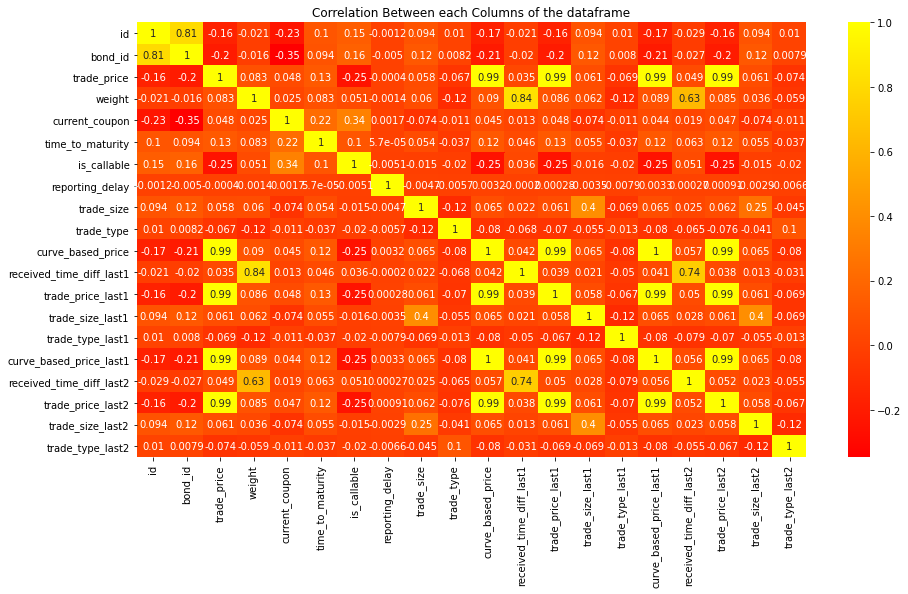

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Correlation Between each Columns of the dataframe')
sns.heatmap(train_data[column].corr(),
            cmap = 'autumn',
            annot = True,
            linecolor = 'white',
            xticklabels = 'auto',
            yticklabels = 'auto',
            cbar = True)

In [ ]:
column2 = list(train_data.columns[20:40])
column2.insert(0, train_data.columns[2])
column2

['trade_price',
 'curve_based_price_last2',
 'received_time_diff_last3',
 'trade_price_last3',
 'trade_size_last3',
 'trade_type_last3',
 'curve_based_price_last3',
 'received_time_diff_last4',
 'trade_price_last4',
 'trade_size_last4',
 'trade_type_last4',
 'curve_based_price_last4',
 'received_time_diff_last5',
 'trade_price_last5',
 'trade_size_last5',
 'trade_type_last5',
 'curve_based_price_last5',
 'received_time_diff_last6',
 'trade_price_last6',
 'trade_size_last6',
 'trade_type_last6']

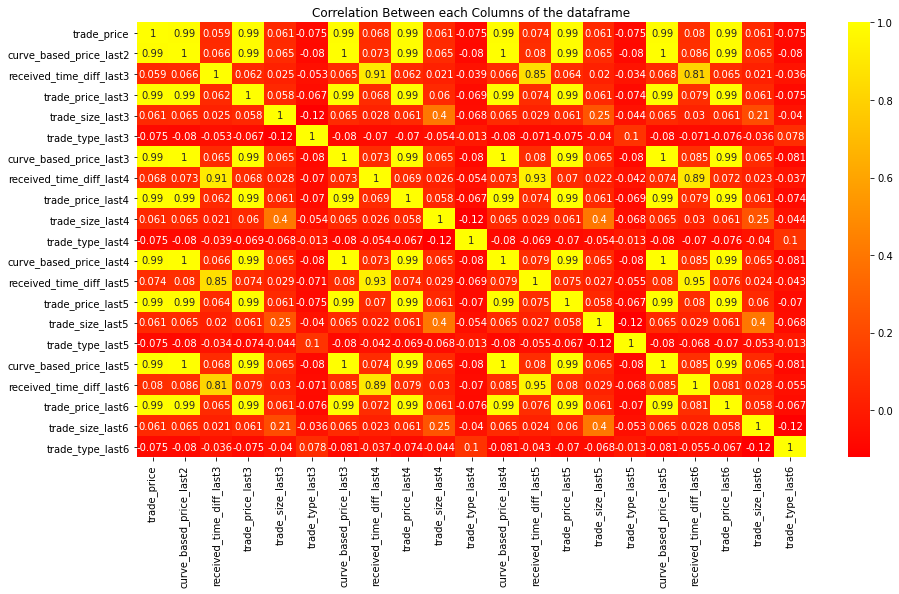

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Correlation Between each Columns of the dataframe')
sns.heatmap(train_data[column2].corr(),
            cmap = 'autumn',
            annot = True,
            linecolor = 'white',
            xticklabels = 'auto',
            yticklabels = 'auto',
            cbar = True);

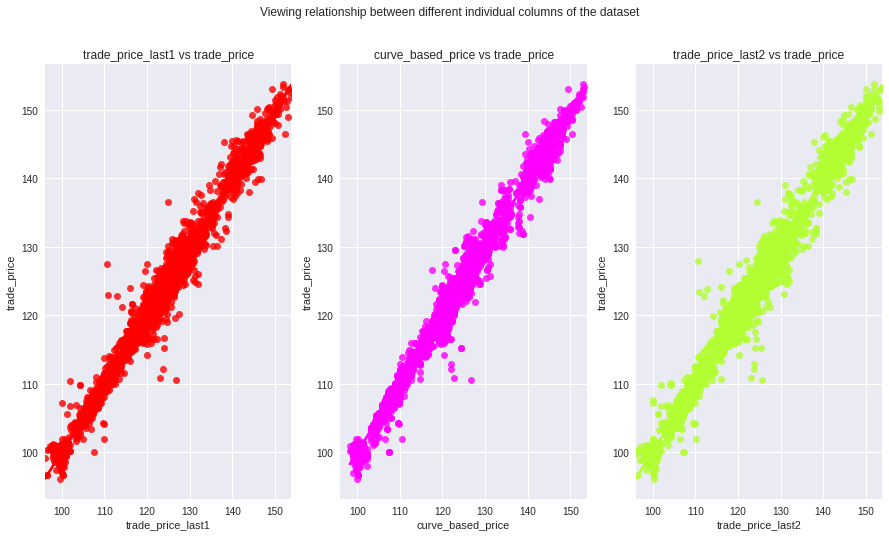

In [ ]:
plt.style.use("seaborn")
figure, axis = plt.subplots(1, 3, sharex = True, figsize=(15,8))
figure.suptitle('Viewing relationship between different individual columns of the dataset')
axis[0].set_title('trade_price_last1 vs trade_price')
sns.regplot(ax = axis[0], data=train_data[:10000], x='trade_price_last1', y='trade_price', color=(1,0,0))
axis[1].set_title('curve_based_price vs trade_price')
sns.regplot(ax = axis[1], data=train_data[:10000], x='curve_based_price', y='trade_price', color=(1,0,1))
axis[2].set_title('trade_price_last2 vs trade_price')
sns.regplot(ax = axis[2], data=train_data[:10000], x='trade_price_last2', y='trade_price', color=(0.7,1,0.2));
#sns.regplot(ax = axix[1,1], data=data[:10000], x='trade_price_last1', y='trade_price')

From the graphs above there is a perfect linear relationship betweeen the 'trade_price' (the column we are to predict) and other columns like 'trade_price_last' and 'curved_base_price'.
The only explanation to this is that the previous trade price of Bond is a strong determinant in the current trade price of Bond

### **DATA PREPARATION**



In [ ]:
#Getting the number of missing value for each column
train_data.isna().sum()

id                               0
bond_id                          0
trade_price                      0
weight                           0
current_coupon                   0
                             ...  
received_time_diff_last10    17316
trade_price_last10           17316
trade_size_last10            17316
trade_type_last10            17316
curve_based_price_last10     17669
Length: 61, dtype: int64

In [ ]:
#Getting the maximum number for each column
train_data.max().head(50)

id                          7.626780e+05
bond_id                     9.151570e+05
trade_price                 1.681480e+02
weight                      4.289622e+01
current_coupon              1.350000e+01
time_to_maturity            8.415950e+01
is_callable                 1.000000e+00
reporting_delay             9.987914e+07
trade_size                  5.000001e+06
trade_type                  4.000000e+00
curve_based_price           1.729562e+02
received_time_diff_last1    1.090253e+07
trade_price_last1           1.681480e+02
trade_size_last1            5.000001e+06
trade_type_last1            4.000000e+00
curve_based_price_last1     1.729562e+02
received_time_diff_last2    1.080817e+07
trade_price_last2           1.681480e+02
trade_size_last2            5.000001e+06
trade_type_last2            4.000000e+00
curve_based_price_last2     1.729562e+02
received_time_diff_last3    1.150356e+07
trade_price_last3           1.681480e+02
trade_size_last3            5.000001e+06
trade_type_last3

For our model to learn well we need to find a way to fill these empty datas in the column and also we need to minimise the value to range between 0 and 1, this will help our model to generalise well. but before then we need to need to get rid of some columns and split our train_data into train and test set

In [ ]:
# splitting the dataset into training and prediction
training_data = train_data.drop(['id', 'bond_id', 'trade_price'], axis = 1)
pred_data = train_data["trade_price"]
# likewise for our test dataset, lets drop the id column.
test_data = test_data.drop(['id'], axis = 1)

In [ ]:
training_data

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089,200000,2,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596,120000,2,127.561201,1213791.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673,85000,4,126.323528,705339.0,128.596,120000.0,2.0,127.561201,1464101.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880,4200000,3,126.761433,254752.0,126.673,85000.0,4.0,126.323528,709781.0,128.596,120000.0,2.0,127.561201,1468543.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362,5000001,2,127.025765,848925.0,126.880,4200000.0,3.0,126.761433,1099236.0,126.673,85000.0,4.0,126.323528,1554265.0,128.596,120000.0,2.0,127.561201,2313027.0,129.089,200000.0,2.0,129.435587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762673,0.554384,5.75,10.005765,0,2.363,50000,3,101.480892,1820,101.257,165000,3,101.366967,2397.0,102.259,15000.0,3.0,101.324067,2733.0,101.418,5000000.0,3.0,101.324067,2848.0,101.541,2000000.0,4.0,101.324067,2977.0,101.259,15000.0,4.0,101.324067,3363.0,101.328,180000.0,4.0,101.266945,3505.0,101.391,50000.0,3.0,101.266945,3510.0,101.391,50000.0,4.0,101.266945,3520.0,101.391,50000.0,4.0,101.266945,3555.0,101.059,500000.0,2.0,101.266945
762674,0.261769,5.75,10.005752,0,154.395,500000,2,101.487747,405,101.334,50000,3,101.480892,2225.0,101.257,165000.0,3.0,101.366967,2802.0,102.259,15000.0,3.0,101.324067,3138.0,101.418,5000000.0,3.0,101.324067,3253.0,101.541,2000000.0,4.0,101.324067,3382.0,101.259,15000.0,4.0,101.324067,3768.0,101.328,180000.0,4.0,101.266945,3910.0,101.391,50000.0,3.0,101.266945,3915.0,101.391,50000.0,4.0,101.266945,3925.0,101.391,50000.0,4.0,101.266945
762675,0.321389,5.75,10.005733,0,48.938,3700000,4,101.446401,611,101.303,500000,2,101.487747,1016.0,101.334,50000.0,3.0,101.480892,2837.0,101.257,165000.0,3.0,101.366967,3413.0,102.259,15000.0,3.0,10

In [ ]:
pred_data

0         128.596
1         126.673
2         126.880
3         126.362
4         124.918
           ...   
762673    101.334
762674    101.303
762675    101.503
762676    101.479
762677    101.440
Name: trade_price, Length: 762678, dtype: float64

In [ ]:
test_data

,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1,trade_size_last1,trade_type_last1,curve_based_price_last1,received_time_diff_last2,trade_price_last2,trade_size_last2,trade_type_last2,curve_based_price_last2,received_time_diff_last3,trade_price_last3,trade_size_last3,trade_type_last3,curve_based_price_last3,received_time_diff_last4,trade_price_last4,trade_size_last4,trade_type_last4,curve_based_price_last4,received_time_diff_last5,trade_price_last5,trade_size_last5,trade_type_last5,curve_based_price_last5,received_time_diff_last6,trade_price_last6,trade_size_last6,trade_type_last6,curve_based_price_last6,received_time_diff_last7,trade_price_last7,trade_size_last7,trade_type_last7,curve_based_price_last7,received_time_diff_last8,trade_price_last8,trade_size_last8,trade_type_last8,curve_based_price_last8,received_time_diff_last9,trade_price_last9,trade_size_last9,trade_type_last9,curve_based_price_last9,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10
0,0.733639,1.30278,1.090694,0,68.135,2250000,2,98.521799,3188,98.200000,5000001,3,98.501951,98934.0,98.0244,145000.0,4.0,98.526323,98934.0,98.0244,145000.0,2.0,98.526323,174891.0,98.200,5000001.0,3.0,98.488617,698564.0,97.942,5000001.0,2.0,98.293641,864615.0,98.8500,300000.0,3.0,98.346771,865338.0,98.740,300000.0,4.0,98.353190,869248.0,98.000,100000.0,3.0,98.358220,869248.0,98.000,100000.0,4.0,98.358220,883612.0,97.050000,100000.0,2.0,98.315355
1,0.403570,8.50000,7.472191,0,2.421,3000,2,119.292424,964,116.417666,3000,3,119.380981,964.0,116.1510,3000.0,4.0,119.380981,974.0,116.1510,3000.0,4.0,119.380981,65470.0,115.592,900000.0,3.0,118.288286,69638.0,115.268,10000.0,4.0,118.356743,69638.0,116.7680,10000.0,3.0,118.356743,69873.0,115.500,195000.0,2.0,118.356743,69874.0,115.500,195000.0,3.0,118.356743,150886.0,115.166,1200000.0,2.0,117.986068,152610.0,115.342000,2200000.0,2.0,117.950083
2,0.416940,8.62500,8.378550,1,25.469,1000000,4,103.973124,1029,104.750000,1000000,4,103.420577,8634.0,104.5000,1000001.0,2.0,103.528594,9664.0,104.5000,1000001.0,3.0,103.478882,16827.0,105.100,11000.0,3.0,102.802233,16827.0,105.000,11000.0,4.0,102.802233,16841.0,105.0000,11000.0,4.0,102.802233,16842.0,105.000,11000.0,4.0,102.802233,82527.0,103.000,1000001.0,3.0,102.794562,82532.0,104.000,5000.0,4.0,102.794562,82534.0,104.000000,5000.0,4.0,102.794562
3,0.012991,7.00000,1.715990,0,12.188,25000,4,106.680891,0,106.693000,15000,3,106.680891,0.0,106.6930,10000.0,3.0,106.680891,7.0,106.6930,25000.0,4.0,106.680891,510.0,107.875,70000.0,3.0,106.677745,695.0,106.693,70000.0,4.0,106.677745,2026.0,107.2500,3000.0,3.0,106.683246,2151.0,106.693,9000.0,4.0,106.694550,2151.0,107.813,9000.0,3.0,106.694550,2209.0,106.754,10000.0,3.0,106.694550,2959.0,107.193000,15000.0,3.0,106.711338
4,14.730664,5.62500,1.241897,0,84.129,1000000,4,103.369002,1285682,101.511000,3000,2,103.509270,1285683.0,102.3860,3000.0,4.0,103.509270,2606546.0,103.3140,10000.0,2.0,103.569851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61141,0.131848,5.62500,7.822351,0,3.054,15000,3,87.727603,102,89.326000,50000,3,87.727603,255.0,89.1730,5000.0,3.0,87.736304,355.0,90.0300,25000.0,3.0,87.736304,898.0,90.127,17000.0,3.0,87.693614,1012.0,86.400,100000.0,4.0,87.693614,1012.0,86.0000,100000.0,4.0,87.693614,1545.0,90.250,25000.0,3.0,87.679456,1616.0,86.750,54000.0,2.0,87.679456,2050.0,87.182,100000.0,2.0,87.660500,2220.0,88.250000,25000.0,4.0,87.660500
61142,0.012991,4.95000,3.721057,0,7.063,40000,4,99.563152,0,101.352000,40000,3,99.563152,6.0,100.3520,40000.0,4.0,99.563152,2633

we are going to fill Missing values with mean of each column using the help of sklearn SipleImputer method

In [ ]:
from sklearn.impute import SimpleImputer
# instatiating the simple imputer object and setting tge startegy to mean
impute = SimpleImputer(strategy = "mean")
impute.fit(training_data)
# filling the missing values for training data with the mean of each column
training_data = pd.DataFrame(impute.transform(training_data), columns=[training_data.columns])
# filling the missing value for the test data with the mean of each of column
test_data = pd.DataFrame(impute.transform(test_data), columns=[test_data.columns])

In [ ]:
# from what we can see, there is no longer missing column in the dataset
training_data.isna().sum()

weight                       0
current_coupon               0
time_to_maturity             0
is_callable                  0
reporting_delay              0
trade_size                   0
trade_type                   0
curve_based_price            0
received_time_diff_last1     0
trade_price_last1            0
trade_size_last1             0
trade_type_last1             0
curve_based_price_last1      0
received_time_diff_last2     0
trade_price_last2            0
trade_size_last2             0
trade_type_last2             0
curve_based_price_last2      0
received_time_diff_last3     0
trade_price_last3            0
trade_size_last3             0
trade_type_last3             0
curve_based_price_last3      0
received_time_diff_last4     0
trade_price_last4            0
trade_size_last4             0
trade_type_last4             0
curve_based_price_last4      0
received_time_diff_last5     0
trade_price_last5            0
trade_size_last5             0
trade_type_last5             0
curve_ba

In [ ]:
test_data.isna().sum()

weight                       0
current_coupon               0
time_to_maturity             0
is_callable                  0
reporting_delay              0
trade_size                   0
trade_type                   0
curve_based_price            0
received_time_diff_last1     0
trade_price_last1            0
trade_size_last1             0
trade_type_last1             0
curve_based_price_last1      0
received_time_diff_last2     0
trade_price_last2            0
trade_size_last2             0
trade_type_last2             0
curve_based_price_last2      0
received_time_diff_last3     0
trade_price_last3            0
trade_size_last3             0
trade_type_last3             0
curve_based_price_last3      0
received_time_diff_last4     0
trade_price_last4            0
trade_size_last4             0
trade_type_last4             0
curve_based_price_last4      0
received_time_diff_last5     0
trade_price_last5            0
trade_size_last5             0
trade_type_last5             0
curve_ba

Lets minimise the value of our dataset, such that the value ranges between (0, 1). we can do this with the help of sklearn MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(training_data)
training_data = pd.DataFrame(scaler.transform(training_data), columns=[list(training_data.columns)])
test_data = pd.DataFrame(scaler.transform(test_data), columns=[list(test_data.columns)])

In [ ]:
training_data.max()

(weight,)                       1.0
(current_coupon,)               1.0
(time_to_maturity,)             1.0
(is_callable,)                  1.0
(reporting_delay,)              1.0
(trade_size,)                   1.0
(trade_type,)                   1.0
(curve_based_price,)            1.0
(received_time_diff_last1,)     1.0
(trade_price_last1,)            1.0
(trade_size_last1,)             1.0
(trade_type_last1,)             1.0
(curve_based_price_last1,)      1.0
(received_time_diff_last2,)     1.0
(trade_price_last2,)            1.0
(trade_size_last2,)             1.0
(trade_type_last2,)             1.0
(curve_based_price_last2,)      1.0
(received_time_diff_last3,)     1.0
(trade_price_last3,)            1.0
(trade_size_last3,)             1.0
(trade_type_last3,)             1.0
(curve_based_price_last3,)      1.0
(received_time_diff_last4,)     1.0
(trade_price_last4,)            1.0
(trade_size_last4,)             1.0
(trade_type_last4,)             1.0
(curve_based_price_last4,)  

In [ ]:
test_data.max()

(weight,)                       0.967525
(current_coupon,)               1.000000
(time_to_maturity,)             1.014406
(is_callable,)                  1.000000
(reporting_delay,)              0.740505
(trade_size,)                   1.000000
(trade_type,)                   1.000000
(curve_based_price,)            0.922660
(received_time_diff_last1,)     0.936123
(trade_price_last1,)            0.959381
(trade_size_last1,)             1.000000
(trade_type_last1,)             1.000000
(curve_based_price_last1,)      0.924261
(received_time_diff_last2,)     0.949905
(trade_price_last2,)            0.959381
(trade_size_last2,)             1.000000
(trade_type_last2,)             1.000000
(curve_based_price_last2,)      0.921541
(received_time_diff_last3,)     1.014477
(trade_price_last3,)            0.972789
(trade_size_last3,)             1.000000
(trade_type_last3,)             1.000000
(curve_based_price_last3,)      0.921007
(received_time_diff_last4,)     0.993201
(trade_price_las

Our dataset has been scaled to range 0 to 1, now we can split our data into training and testing dataset for both the training datset and the validation datset. We will do this with help of sklearn train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_output, test_output = train_test_split(training_data,
                                                                      pred_data,
                                                                      test_size = 0.3,
                                                                      random_state =  42)

now that we are done with the processing step, lets save all the dataset we need, so that we can be able to load them anytime we want

In [ ]:
import pickle
train_input.to_pickle("train_input")
test_input.to_pickle("test_input")
train_output.to_pickle("train_output")
test_output.to_pickle("test_output")
train_data.to_pickle("train_data")
training_data.to_pickle("training_data")
pred_data.to_pickle("val_data")
test_data.to_pickle("test_data")

In [ ]:
# loading the data back
train_input = pd.read_pickle("train_input")
test_input = pd.read_pickle("test_input")
train_output = pd.read_pickle("train_output")
test_output = pd.read_pickle("test_output")
test_data = pd.read_pickle("test_data")

In [ ]:
train_input

,"(weight,)","(current_coupon,)","(time_to_maturity,)","(is_callable,)","(reporting_delay,)","(trade_size,)","(trade_type,)","(curve_based_price,)","(received_time_diff_last1,)","(trade_price_last1,)","(trade_size_last1,)","(trade_type_last1,)","(curve_based_price_last1,)","(received_time_diff_last2,)","(trade_price_last2,)","(trade_size_last2,)","(trade_type_last2,)","(curve_based_price_last2,)","(received_time_diff_last3,)","(trade_price_last3,)","(trade_size_last3,)","(trade_type_last3,)","(curve_based_price_last3,)","(received_time_diff_last4,)","(trade_price_last4,)","(trade_size_last4,)","(trade_type_last4,)","(curve_based_price_last4,)","(received_time_diff_last5,)","(trade_price_last5,)","(trade_size_last5,)","(trade_type_last5,)","(curve_based_price_last5,)","(received_time_diff_last6,)","(trade_price_last6,)","(trade_size_last6,)","(trade_type_last6,)","(curve_based_price_last6,)","(received_time_diff_last7,)","(trade_price_last7,)","(trade_size_last7,)","(trade_type_last7,)","(curve_based_price_last7,)","(received_time_diff_last8,)","(trade_price_last8,)","(trade_size_last8,)","(trade_type_last8,)","(curve_based_price_last8,)","(received_time_diff_last9,)","(trade_price_last9,)","(trade_size_last9,)","(trade_type_last9,)","(curve_based_price_last9,)","(received_time_diff_last10,)","(trade_price_last10,)","(trade_size_last10,)","(trade_type_last10,)","(curve_based_price_last10,)"
21395,0.000000,0.344444,0.028615,0.0,6.003652e-07,0.0012,0.0,0.610824,0.000000,0.627736,0.0012,1.0,0.610824,1.790313e-04,0.627775,0.0020,0.5,0.611023,0.000172,0.627775,0.0020,1.0,0.611023,0.000215,0.627819,0.0010,0.0,0.601346,0.000215,0.627819,0.0010,1.0,0.588044,0.000488,0.628178,0.0580,0.0,0.588065,0.000488,0.628178,0.0580,1.0,0.588065,0.000681,0.628142,0.0010,0.0,0.588039,0.000841,0.629186,0.0200,0.5,0.588022,0.000978,0.627579,0.0024,1.0,0.588074
716363,0.010412,0.233333,0.053709,0.0,6.057417e-07,0.6000,1.0,0.565988,0.000115,0.582760,1.0000,0.0,0.566108,1.330475e-04,0.592507,0.0010,0.5,0.566108,0.000128,0.592507,0.0020,0.5,0.566108,0.000176,0.583884,0.0050,0.5,0.557058,0.000179,0.583884,0.0050,1.0,0.544735,0.000190,0.583884,0.0020,0.5,0.544735,0.000199,0.583884,0.0020,1.0,0.544735,0.000205,0.584633,0.2000,1.0,0.544735,0.000212,0.584256,0.2000,1.0,0.544679,0.000219,0.592315,0.0060,0.5,0.544679
602256,0.003043,0.425926,0.106362,0.0,5.918550e-07,0.0600,0.5,0.583575,0.000011,0.603456,0.1000,0.0,0.583575,2.618390e-05,0.605729,0.0600,0.0,0.583575,0.000025,0.605729,0.0600,1.0,0.583575,0.000059,0.603815,0.2000,0.5,0.573803,0.000073,0.603456,0.1000,1.0,0.561110,0.000936,0.603516,0.1000,1.0,0.561003,0.000954,0.603157,0.1000,1.0,0.560702,0.001447,0.601990,0.0500,0.5,0.560240,0.001899,0.602738,0.0778,0.0,0.560251,0.001903,0.603336,0.0778,0.5,0.560251
548386,0.073144,0.348148,0.107349,0.0,7.581759e-07,0.1850,0.5,0.612617,0.005391,0.635645,0.0074,0.5,0.613921,5.443661e-03,0.635645,0.0074,1.0,0.613921,0.012637,0.639187,0.0004,0.5,0.612816,0.012374,0.639187,0.0004,1.0,0.603075,0.012528,0.623948,0.0002,0.0,0.589937,0.012912,0.623948,0.0002,1.0,0.589937,0.013003,0.631564,0.0380,0.0,0.590166,0.013627,0.631546,0.0006,0.0,0.588803,0.013536,0.631546,0.0006,1.0,0.588803,0.019925,0.628525,0.0140,0.0,0.588014
118941,0.002946,0.435185,0.012907,0.0,7.525791e-07,0.0250,1.0,0.600004,0.000010,0.623996,0.0200,0.5,0.600004,1.350830e-05,0.623397,0.0200,1.0,0.600004,0.029898,0.620986,0.0040,0.5,0.599833,0.066536,0.616798,0.0040,1.0,0.590114,0.066541,0.616798,0.0040,1.0,0.577059,0.068782,0.611712,0.0040,0.0,0.577059,0.113742,0.622183,0.0020,1.0,0.576721,0.114406,0.622781,0.0020,0.5,0.576721,0.122691,0.615667,0.0250,1.0,0.576463,0.121886,0.615667,0.0250,1.0,0.576463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.004944,0.400000,0.050447,0.0,6.088455e-07,0.0022,0.5,0.664253,0.0000

In [ ]:
test_input

,"(weight,)","(current_coupon,)","(time_to_maturity,)","(is_callable,)","(reporting_delay,)","(trade_size,)","(trade_type,)","(curve_based_price,)","(received_time_diff_last1,)","(trade_price_last1,)","(trade_size_last1,)","(trade_type_last1,)","(curve_based_price_last1,)","(received_time_diff_last2,)","(trade_price_last2,)","(trade_size_last2,)","(trade_type_last2,)","(curve_based_price_last2,)","(received_time_diff_last3,)","(trade_price_last3,)","(trade_size_last3,)","(trade_type_last3,)","(curve_based_price_last3,)","(received_time_diff_last4,)","(trade_price_last4,)","(trade_size_last4,)","(trade_type_last4,)","(curve_based_price_last4,)","(received_time_diff_last5,)","(trade_price_last5,)","(trade_size_last5,)","(trade_type_last5,)","(curve_based_price_last5,)","(received_time_diff_last6,)","(trade_price_last6,)","(trade_size_last6,)","(trade_type_last6,)","(curve_based_price_last6,)","(received_time_diff_last7,)","(trade_price_last7,)","(trade_size_last7,)","(trade_type_last7,)","(curve_based_price_last7,)","(received_time_diff_last8,)","(trade_price_last8,)","(trade_size_last8,)","(trade_type_last8,)","(curve_based_price_last8,)","(received_time_diff_last9,)","(trade_price_last9,)","(trade_size_last9,)","(trade_type_last9,)","(curve_based_price_last9,)","(received_time_diff_last10,)","(trade_price_last10,)","(trade_size_last10,)","(trade_type_last10,)","(curve_based_price_last10,)"
369154,0.000000,0.485185,0.308888,0.0,9.296630e-07,0.002,1.0,0.611327,0.000000e+00,0.634448,0.002,0.0,0.611327,0.006110,0.612764,0.05337,0.615966,0.592607,0.008416,0.612703,0.053308,0.616134,0.592546,0.010777,0.612645,0.053269,0.616243,0.583069,0.013217,0.612588,0.053226,0.616414,0.570116,0.016046,0.612531,0.053164,0.616566,0.570061,0.018395,0.612475,0.053111,0.616693,0.570008,0.020795,0.612421,0.053062,0.616862,0.569957,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
69012,0.000125,0.592593,0.027047,0.0,6.118291e-07,0.002,1.0,0.576504,9.172182e-08,0.604234,0.002,0.5,0.576504,0.001048,0.605729,0.00200,0.500000,0.576003,0.000985,0.599746,0.002000,1.000000,0.576003,0.000965,0.599746,0.002000,1.000000,0.566847,0.014488,0.593015,0.200000,0.500000,0.554111,0.014934,0.591520,0.200000,0.000000,0.554111,0.054187,0.591520,0.110000,0.500000,0.551952,0.107550,0.598550,0.007000,1.000000,0.552181,0.106832,0.599148,0.007000,0.500000,0.552181,0.106131,0.598550,0.007000,1.000000,0.552181
565061,0.070152,0.277778,0.043874,0.0,2.383162e-05,0.014,0.5,0.567482,4.960866e-03,0.598251,0.020,0.5,0.566968,0.005454,0.590772,0.00200,0.500000,0.566422,0.005126,0.590772,0.002000,1.000000,0.566422,0.005053,0.592655,0.020000,1.000000,0.557418,0.005108,0.591197,0.010000,0.500000,0.545117,0.005285,0.592465,0.002000,0.500000,0.545117,0.005286,0.591717,0.002000,1.000000,0.545117,0.005330,0.591197,0.010000,0.500000,0.545117,0.005815,0.596635,0.002000,0.500000,0.545345,0.005778,0.591256,0.002000,1.000000,0.545345
329245,0.007379,0.453704,0.065602,0.0,6.425962e-07,0.005,0.5,0.622764,5.888541e-05,0.634023,0.005,0.0,0.622717,0.000061,0.634023,0.00500,1.000000,0.622717,0.000058,0.634023,0.005000,1.000000,0.622717,0.000142,0.642196,0.003000,1.000000,0.612860,0.000143,0.642196,0.003000,0.500000,0.599261,0.000223,0.641628,0.003000,1.000000,0.599270,0.000223,0.641628,0.003000,0.500000,0.599270,0.000228,0.642358,0.005000,1.000000,0.599270,0.000338,0.645313,0.004000,1.000000,0.599494,0.000336,0.651296,0.004000,0.500000,0.599494
134977,0.075285,0.370370,0.021353,0.0,8.159159e-04,0.001,1.0,0.573552,5.710050e-03,0.599010,0.001,0.5,0.573730,0.005833,0.596414,0.00200,1.000000,0.573865,0.005480,0.601529,0.002000,0.500000,0.573865,0.005460,0.593165,0.004200,0.500000,0.564870,0.005461,0.593165,0.001000,0.500000,0.552374,0.005653,0.593165,0.005200,1.000000,0.552059,0.007058,0.590772,0.001000,1.000000,0.551635,0.007112,0.590772,0.001000,0.000000,0.551618,0.007134,0.590772,0.001000,1.000000,0.551640,0.036122,0.589226,0.006000,0.000000,0.553150
...,...,...,.

In [ ]:
train_output

21395     105.9281
716363     98.8480
602256    103.2500
548386    107.1030
118941    104.6360
            ...   
259178    115.8890
365838    103.1000
131932    108.3400
671155     84.5000
121958    100.0320
Name: trade_price, Length: 533874, dtype: float64

In [ ]:
test_output

369154    109.44600
69012     101.50000
565061    100.36430
329245    108.43300
134977     99.75000
            ...    
95072     104.41300
675441    103.19600
505223     92.14150
341380    113.96335
172768    100.25500
Name: trade_price, Length: 228804, dtype: float64

In [ ]:
test_data

,"(weight,)","(current_coupon,)","(time_to_maturity,)","(is_callable,)","(reporting_delay,)","(trade_size,)","(trade_type,)","(curve_based_price,)","(received_time_diff_last1,)","(trade_price_last1,)","(trade_size_last1,)","(trade_type_last1,)","(curve_based_price_last1,)","(received_time_diff_last2,)","(trade_price_last2,)","(trade_size_last2,)","(trade_type_last2,)","(curve_based_price_last2,)","(received_time_diff_last3,)","(trade_price_last3,)","(trade_size_last3,)","(trade_type_last3,)","(curve_based_price_last3,)","(received_time_diff_last4,)","(trade_price_last4,)","(trade_size_last4,)","(trade_type_last4,)","(curve_based_price_last4,)","(received_time_diff_last5,)","(trade_price_last5,)","(trade_size_last5,)","(trade_type_last5,)","(curve_based_price_last5,)","(received_time_diff_last6,)","(trade_price_last6,)","(trade_size_last6,)","(trade_type_last6,)","(curve_based_price_last6,)","(received_time_diff_last7,)","(trade_price_last7,)","(trade_size_last7,)","(trade_type_last7,)","(curve_based_price_last7,)","(received_time_diff_last8,)","(trade_price_last8,)","(trade_size_last8,)","(trade_type_last8,)","(curve_based_price_last8,)","(received_time_diff_last9,)","(trade_price_last9,)","(trade_size_last9,)","(trade_type_last9,)","(curve_based_price_last9,)","(received_time_diff_last10,)","(trade_price_last10,)","(trade_size_last10,)","(trade_type_last10,)","(curve_based_price_last10,)"
0,0.016805,0.096502,0.011992,0.0,1.268693e-06,0.4500,0.0,0.565245,2.924092e-04,0.581498,1.0000,0.5,0.565129,9.153633e-03,0.580447,0.0290,1.0,0.565272,8.600298e-03,0.580447,0.0290,0.0,0.565272,0.014883,0.581498,1.000000,0.500000,0.556069,0.059448,0.579954,1.000000,0.000000,0.542672,0.075834,0.585387,0.060000,0.500000,0.542971,0.075897,0.584729,0.060000,1.000000,0.543007,0.076685,0.580301,0.020000,0.500000,0.543035,0.076173,0.580301,0.020000,1.000000,0.543035,0.076923,0.574618,0.020000,0.000000,0.542794
1,0.009108,0.629630,0.087892,0.0,6.107578e-07,0.0006,0.0,0.686562,8.841984e-05,0.690495,0.0006,0.5,0.687079,8.919180e-05,0.688900,0.0006,1.0,0.687079,8.466948e-05,0.688900,0.0006,1.0,0.687079,0.005572,0.685555,0.180000,0.500000,0.669877,0.005926,0.683617,0.002000,1.000000,0.655442,0.006108,0.692591,0.002000,0.500000,0.655442,0.006128,0.685005,0.039000,0.000000,0.655442,0.006164,0.685005,0.039000,0.500000,0.655442,0.013222,0.683006,0.240000,0.000000,0.653359,0.013286,0.684059,0.440000,0.000000,0.653157
2,0.009420,0.638889,0.098672,1.0,8.415165e-07,0.2000,1.0,0.597085,9.438175e-05,0.620687,0.2000,1.0,0.593858,7.988403e-04,0.619191,0.2000,0.0,0.594489,8.400881e-04,0.619191,0.2000,0.5,0.594199,0.001432,0.622781,0.002200,0.500000,0.580864,0.001432,0.622183,0.002200,1.000000,0.568014,0.001477,0.622183,0.002200,1.000000,0.568014,0.001477,0.622183,0.002200,1.000000,0.568014,0.007281,0.610217,0.200000,0.500000,0.567971,0.007232,0.616200,0.001000,1.000000,0.567971,0.007185,0.616200,0.001000,1.000000,0.567971
3,0.000000,0.518519,0.019429,0.0,7.085459e-07,0.0050,1.0,0.612901,0.000000e+00,0.632312,0.0030,0.5,0.612901,0.000000e+00,0.632312,0.0020,0.5,0.612901,6.085075e-07,0.632312,0.0050,1.0,0.612901,0.000043,0.639384,0.014000,0.500000,0.603140,0.000059,0.632312,0.014000,1.000000,0.589797,0.000178,0.635645,0.000600,0.500000,0.589828,0.000189,0.632312,0.001800,1.000000,0.589892,0.000190,0.639013,0.001800,0.500000,0.589892,0.000194,0.632677,0.002000,0.500000,0.589892,0.000258,0.635304,0.003000,0.500000,0.589986
4,0.343203,0.416667,0.013790,0.0,1.428826e-06,0.2000,1.0,0.593557,1.179251e-01,0.601308,0.0006,0.0,0.594376,1.189548e-01,0.606543,0.0006,1.0,0.594376,2.265861e-01,0.612095,0.0020,0.0,0.594730,0.010777,0.612645,0.053269,0.616243,0.583069,0.013217,0.612588,0.053226,0.616414,0.570116,0.016046,0.612531,0.053164,0.616566,0.570061,0.018395,0.612475,0.053111,0.616693,0.570008,0.020795,0.612421,0.053062,0.616862,0.569957,0.022869,0.612368,0.053007,0.616978,0.569906,0.024850,0.612316,0.052958,0.617093,0.569856
...,...,...,...,...,...,...,...,...,...,...,...,...,

### **CHOOSING THE MODEL**

We are going to be using three machine learning algorithm to train our model:
*   **Linear Regression**
*   **Random Forest Regressor**

### **TRAINING THE MODEL**

In [ ]:
# Training Using Linear regression
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(train_input, train_output)
linearPredictTrain = linearModel.predict(train_input)
linearPredictTest = linearModel.predict(test_input)


Let's seee the coefficient for our model, the coefficient is simply the increase in output for every unit increase in each input column

In [ ]:
pd.DataFrame(linearModel.coef_,
             train_input.columns,
             columns = ["coeff"])

,coeff
"(weight,)",0.068925
"(current_coupon,)",0.031542
"(time_to_maturity,)",0.179440
"(is_callable,)",0.005249
"(reporting_delay,)",-1.111657
"(trade_size,)",-0.279759
"(trade_type,)",0.189429
"(curve_based_price,)",73.994006
"(received_time_diff_last1,)",-2.361477
"(trade_price_last1,)",67.583032


The competition will rank each submission using Mean Absolute error, lets write a function to calculate our mean absolute error

In [ ]:
def mean_absolute_error(actualvalue, prediction):
  return np.abs(np.mean(np.subtract(actualvalue, prediction)))

In [ ]:
train_absolute_error = mean_absolute_error(linearPredictTrain, train_output)
train_absolute_error

5.705953339238799e-15

In [ ]:
test_absolute_error = mean_absolute_error(test_output, linearPredictTest)
test_absolute_error

0.0029506179401354122

In [ ]:
print(f'The absolute error forthe training dataset is: {train_absolute_error}')
print(f'The absolute error for the validation dataset is: {test_absolute_error}')


The absolute error forthe training dataset is: 5.705953339238799e-15
The absolute error for the validation dataset is: 0.0029506179401354122


Let's also compute the mean squared error using sklearn mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
train_mean_squared_error = mean_squared_error(linearPredictTrain, train_output, squared = False)
test_mean_squared_error = mean_squared_error(test_output, linearPredictTest, squared = False)
print(f'The mean squared error for the training dataset is: {train_mean_squared_error}')
print(f'The mean squared error for the validation dataset is: {test_mean_squared_error}')


The mean squared error for the training dataset is: 1.028535174231581
The mean squared error for the validation dataset is: 1.0018836629336496


In [ ]:
# training using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
randModel = RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
randModel.fit(train_input, train_output)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
train_random_predict = randModel.predict(train_input)
test_random_predict = randModel.predict(test_input)

In [ ]:
train_random_predict

array([105.92572606,  98.80137411, 102.84983   , ..., 108.480003  ,
        85.280918  ,  99.9808    ])

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
mean_absolute_error(test_output, test_random_predict)

0.435214103187108

In [ ]:
mean_squared_error(test_output, test_random_predict)

0.6360759464857896

**Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randtestmodei = RandomForestRegressor(n_jobs = -1, random_state = 42)
distribution = {
    "max_depth" : [1, 200],
    "max_leaf_nodes" : [5, 50],
    "n_estimators" : [1, 100],
    "bootstrap" : ["True", "False"],
    "max_features" : [“auto”, “sqrt”, “log2”]

}
clf = RandomizedSearchCV(randtestmodei, distribution)
search = clf.fit(train_input, train_output)

SyntaxError: ignored

In [ ]:
optim_test_predict = search.predict(test_input)
optim_train_predict = search.predict(train_input)

In [ ]:
optim_train_error = mean_squared_error(optim_train_predict, train_output, squared = False)
optim_test_error = mean_squared_error(optim_test_predict. test_output, squared = False)
print(f'The mean squared error for the training dataset is: {optim_train_error}')
print(f'The mean squared error for the validation dataset is: {optim_test_error}')

In [ ]:
!pip install jovian
import jovian
jovian.submit(assignment="zerotogbms-project")